# 2. _GRAPH CONSTRUCTION - PYTORCH GEOMETRIC_

## Data loading

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv("/content/data_cleaned.csv")
data.head()

,id,tags,followersCount,friends_count,friends
0,1969527638,#nationaldogday,319,1,['1969901029']
1,232891415,#gloryoutnow,492,1,['57795767']
2,413415713,#narcos,582,1,['3345886792']
3,518053777,#nationaldogday,688,2,"['483375875', '313475995']"
4,3157134163,#justinssextapeleakedparty,138,1,['3437565839']


In [ ]:
data.shape

(19862, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19862 entries, 0 to 19861
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              19862 non-null  int64 
 1   tags            19862 non-null  object
 2   followersCount  19862 non-null  int64 
 3   friends_count   19862 non-null  int64 
 4   friends         19862 non-null  object
dtypes: int64(3), object(2)
memory usage: 776.0+ KB


In [ ]:
data['id'] = data['id'].astype(str) # for creation of edges

## pytorch geometric installation

In [ ]:
!pip install torch-geometric

## pytorch geometric data object creation

1. node features (nodes x features)

Assuming 4 nodes and 3 features per node

node_features = torch.tensor([[1.0, 2.0, 3.0],

                              [4.0, 5.0, 6.0],

                              [7.0, 8.0, 9.0],

                              [10.0, 11.0, 12.0]], dtype=torch.float)

2. edge index (2 x edges)

Edges: (0->1), (1->2), (2->3), (3->0)

edge_index = torch.tensor([[0, 1, 2, 3],

                           [1, 2, 3, 0]], dtype=torch.long)  

3. create pytorch geometric data object

from torch_geometric.data import Data

data = Data(x=node_features, edge_index=edge_index)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

tag_encoder = LabelEncoder()
data['tags_encoded'] = tag_encoder.fit_transform(data['tags'])

scaler = StandardScaler()
data[['followersCount', 'friends_count']] = scaler.fit_transform(data[['followersCount', 'friends_count']])

data.head()

,id,tags,followersCount,friends_count,friends,tags_encoded
0,1969527638,#nationaldogday,-0.036418,-0.580514,['1969901029'],83
1,232891415,#gloryoutnow,-0.035010,-0.580514,['57795767'],25
2,413415713,#narcos,-0.034277,-0.580514,['3345886792'],82
3,518053777,#nationaldogday,-0.033414,-0.313667,"['483375875', '313475995']",83
4,3157134163,#justinssextapeleakedparty,-0.037891,-0.580514,['3437565839'],58


1. Node feature creation

In [ ]:

import torch
node_features = data[['tags_encoded', 'followersCount', 'friends_count']].values
node_features = torch.tensor(node_features, dtype=torch.float) #same like numpy array for pytorch
node_features

tensor([[ 8.3000e+01, -3.6418e-02, -5.8051e-01],
        [ 2.5000e+01, -3.5010e-02, -5.8051e-01],
        [ 8.2000e+01, -3.4277e-02, -5.8051e-01],
        ...,
        [ 1.8500e+02, -1.5166e-02,  2.2003e-01],
        [ 4.0000e+00, -3.8046e-02, -5.8051e-01],
        [ 1.8500e+02, -1.5564e-02, -4.6821e-02]])

2. edge index creation

In [ ]:
id_to_index = {id_: idx for idx, id_ in enumerate(data['id'])}
print(id_to_index)

{'1969527638': 0, '232891415': 1, '413415713': 2, '518053777': 3, '3157134163': 4, '451819350': 5, '465857810': 6, '1969604874': 7, '353480695': 8, '1687385503': 9, '2422549237': 10, '69611563': 11, '3336015731': 12, '708420695508783104': 13, '543355544': 14, '1970490685': 15, '1571949344': 16, '1210896074': 17, '738833141905903616': 18, '859915406': 19, '1061707502': 20, '1970021983': 21, '114026048': 22, '1038752040': 23, '829620078': 24, '1721614015': 25, '2331525829': 26, '327060974': 27, '1328491903': 28, '701740027995361280': 29, '491885770': 30, '744367703511572480': 31, '724210128694603776': 32, '30571544': 33, '707053416258797568': 34, '708087926861733888': 35, '2279916672': 36, '82069488': 37, '467554781': 38, '394620057': 39, '124593389': 40, '123666386': 41, '1973279371': 42, '3042356929': 43, '178655590': 44, '263891173': 45, '1972784328': 46, '2949265599': 47, '3375226852': 48, '1972640780': 49, '834368527': 50, '131649669': 51, '978573830': 52, '89158554': 53, '811837410

In [ ]:
print(type(data['friends'][0]))
print(type(data['friends'][0][0]))

<class 'str'>
<class 'str'>


In [ ]:
import ast

data['friends'] = data['friends'].apply(ast.literal_eval)
print(type(data['friends'][0]))
print(type(data['friends'][0][0]))

<class 'list'>
<class 'str'>


In [ ]:
print(type(data['id'][0]))

<class 'str'>


In [ ]:
import torch

edges = []
for i, friends_list_str in enumerate(data['friends']):
    source = id_to_index[data.iloc[i]['id']]  # Index of the source ID of the current friend

    if i == 0:
        print(source, data.iloc[i]['id'])  # For printing purpose

    for friend_id in friends_list_str:
        if friend_id in id_to_index:
            target = id_to_index[friend_id]  # Index of target ID
            edges.append([source, target])

edges = torch.tensor(edges, dtype=torch.long).t().contiguous() # transpose,
print(edges)
print(edges.shape)

0 1969527638
tensor([[    0,     1,     2,  ..., 19861, 19861, 19861],
        [ 6115,  5275, 19476,  ..., 15061, 19772, 19859]])
torch.Size([2, 58377])


3. pytorch geometric data object creation

In [ ]:
from torch_geometric.data import Data

data_object = Data(x=node_features,
                   edge_index=edges)

In [ ]:
print(data_object) # node feature, edge index
print(data_object.x)  # Node features = [no of nodes, no of features]
print(data_object.edge_index)  # Edge index = [ 2 rows of sorce & target, no of edges]

Data(x=[19862, 3], edge_index=[2, 58377])
tensor([[ 8.3000e+01, -3.6418e-02, -5.8051e-01],
        [ 2.5000e+01, -3.5010e-02, -5.8051e-01],
        [ 8.2000e+01, -3.4277e-02, -5.8051e-01],
        ...,
        [ 1.8500e+02, -1.5166e-02,  2.2003e-01],
        [ 4.0000e+00, -3.8046e-02, -5.8051e-01],
        [ 1.8500e+02, -1.5564e-02, -4.6821e-02]])
tensor([[    0,     1,     2,  ..., 19861, 19861, 19861],
        [ 6115,  5275, 19476,  ..., 15061, 19772, 19859]])


In [ ]:
print('Graph properties')
print('==============================================================')

print(f'Number of nodes: {data_object.num_nodes}')
print(f'Number of edges: {data_object.num_edges}')
print(f'Average node degree: {data_object.num_edges / data_object.num_nodes:.2f}')
print(f'Contains isolated nodes: {data_object.has_isolated_nodes()}')
print(f'Contains self-loops: {data_object.has_self_loops()}')

Graph properties
Number of nodes: 19862
Number of edges: 58377
Average node degree: 2.94
Contains isolated nodes: True
Contains self-loops: False


## visualizing pytorch graph

In [ ]:
from torch_geometric.utils import to_networkx
import matplotlib.pyplot as plt
import networkx as nx

G = to_networkx(data_object, to_undirected=True) #edges have no direction - undirected

1. Randomly samples nodes

In [ ]:
range(data_object.num_nodes)

range(0, 19862)

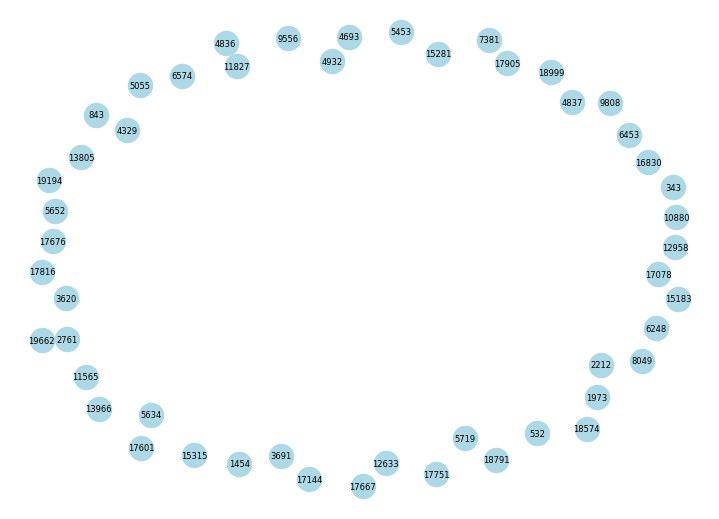

In [ ]:
import random

sample_size = 50  # Number of nodes to sample, length of sample
sampled_nodes = random.sample(range(data_object.num_nodes), sample_size)

G_sub = G.subgraph(sampled_nodes)

plt.figure(figsize=(7,5))
nx.draw(G_sub, with_labels=True, node_color='lightblue', edge_color='black', node_size=300, font_size=6)
plt.show()

2. Connected subgraph at a particular radius

In [ ]:
print(dict(G.degree()).items())

dict_items([(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 5), (6, 1), (7, 3), (8, 1), (9, 4), (10, 1), (11, 0), (12, 3), (13, 2), (14, 2), (15, 5), (16, 1), (17, 1), (18, 0), (19, 2), (20, 0), (21, 1), (22, 1), (23, 1), (24, 1), (25, 0), (26, 7), (27, 1), (28, 3), (29, 2), (30, 3), (31, 1), (32, 1), (33, 5), (34, 15), (35, 3), (36, 0), (37, 1), (38, 3), (39, 5), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 3), (46, 4), (47, 3), (48, 1), (49, 1), (50, 2), (51, 1), (52, 1), (53, 1), (54, 1), (55, 4), (56, 3), (57, 1), (58, 1), (59, 3), (60, 3), (61, 0), (62, 3), (63, 2), (64, 26), (65, 1), (66, 1), (67, 0), (68, 1), (69, 2), (70, 2), (71, 2), (72, 3), (73, 6), (74, 0), (75, 1), (76, 4), (77, 0), (78, 7), (79, 1), (80, 1), (81, 4), (82, 1), (83, 2), (84, 0), (85, 2), (86, 1), (87, 4), (88, 1), (89, 2), (90, 1), (91, 0), (92, 3), (93, 2), (94, 11), (95, 1), (96, 2), (97, 2), (98, 0), (99, 2), (100, 14), (101, 0), (102, 1), (103, 3), (104, 2), (105, 2), (106, 1), (107, 1), (108, 2), (109

6057


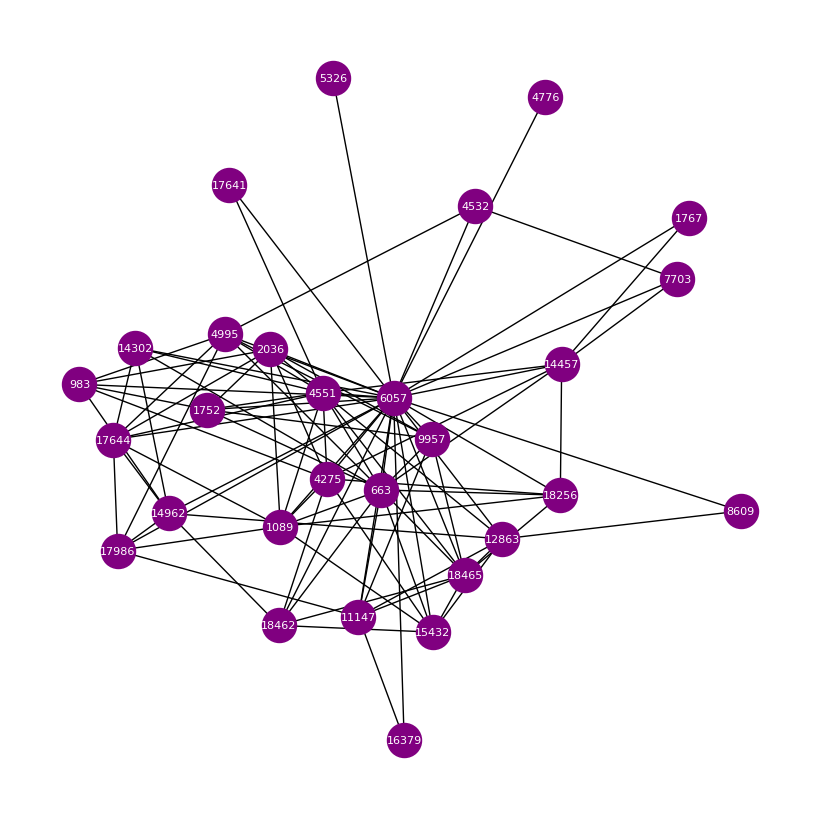

In [ ]:
# Choose a central node (e.g., the node with the highest degree)
central_node = max(dict(G.degree()).items(), key=lambda x: x[1])[0] # returns a tuple (node,degree), [0] -> node
print(central_node)

#creating list of node whose degree < 40
low_degree_threshold = 40
nodes_to_remove = [node for node, degree in dict(G.degree()).items() if degree <= low_degree_threshold]

# Create a small ego graph around this central node (e.g., radius=1)
G_sub = nx.ego_graph(G, central_node, radius=1)  # radius=1 includes immediate neighbors
G_sub.remove_nodes_from(nodes_to_remove)

plt.figure(figsize=(8, 8))
nx.draw(G_sub, with_labels=True, node_color='purple', edge_color='black',font_color = 'white', node_size=600, font_size=8)
plt.show()

## Saving graph object

In [ ]:
original_data_object = data_object

In [ ]:
torch.save(data_object, 'graph_data.pth')

# 3. _MODEL PERFORMANCES_

In [ ]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv, GATConv, APPNP, SAGEConv
import torch.optim as optim
import matplotlib.pyplot as plt

## Y label and train test masking

In [ ]:
def setup_data(data, tags, train_ratio=0.8):
    data.y = torch.tensor(tags, dtype=torch.long)

    num_nodes = data.num_nodes
    train_mask = torch.zeros(num_nodes, dtype=torch.bool)
    test_mask = torch.zeros(num_nodes, dtype=torch.bool)
    num_train_nodes = int(train_ratio * num_nodes)
    train_mask[:num_train_nodes] = 1
    test_mask[num_train_nodes:] = 1
    data.train_mask = train_mask
    data.test_mask = test_mask

    return data

## Optimizer and Loss setup

In [ ]:
def setup_optimizer_and_loss(model, lr=0.01):
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = torch.nn.CrossEntropyLoss()
    return optimizer, criterion

## Models

In [ ]:
class GCN(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(num_features, 16)
        self.conv2 = GCNConv(16, 32)
        self.conv3 = GCNConv(32, 64)
        self.classifier = Linear(64, num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index).relu()
        x = self.conv2(x, edge_index).relu()
        x = self.conv3(x, edge_index).relu()
        out = self.classifier(x)
        return out, x

In [ ]:
class GAT(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super(GAT, self).__init__()
        self.conv1 = GATConv(num_features, 16, heads=4)
        self.conv2 = GATConv(16 * 4, 32, heads=4)
        self.conv3 = GATConv(32 * 4, 64, heads=4)
        self.classifier = Linear(64 * 4, num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index).relu()
        x = self.conv2(x, edge_index).relu()
        x = self.conv3(x, edge_index).relu()
        out = self.classifier(x)
        return out, x

In [ ]:
class APPNPNet(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super(APPNPNet, self).__init__()
        self.lin1 = Linear(num_features, 64)
        self.lin2 = Linear(64, num_classes)
        self.prop = APPNP(K=10, alpha=0.1)

    def forward(self, x, edge_index):
        x = self.lin1(x).relu()
        x = self.prop(x, edge_index)
        out = self.lin2(x)
        return out, x

In [ ]:
class GraphSAGEModel(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super(GraphSAGEModel, self).__init__()
        # Use SAGEConv instead of GraphSAGE
        self.conv1 = SAGEConv(num_features, 16)
        self.conv2 = SAGEConv(16, 32)
        self.conv3 = SAGEConv(32, 64)
        self.classifier = Linear(64, num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index).relu()
        x = self.conv2(x, edge_index).relu()
        x = self.conv3(x, edge_index).relu()
        out = self.classifier(x)
        return out, x

## Training

In [ ]:
def train(model, data, criterion, optimizer, epochs=201):
    model.train()
    training_losses = []
    training_accuracies = []

    for epoch in range(epochs):
        optimizer.zero_grad()
        out, _ = model(data.x, data.edge_index) # output predicted

        loss = criterion(out[data.train_mask], data.y[data.train_mask])
        loss.backward()
        optimizer.step()

        pred = out[data.train_mask].argmax(dim=1)
        correct = (pred == data.y[data.train_mask]).sum().item()
        accuracy = correct / data.train_mask.sum().item()

        training_losses.append(loss.item())
        training_accuracies.append(accuracy)

        if epoch % 20 == 0:
            print(f'Epoch {epoch}, Loss: {loss.item()}, Accuracy: {accuracy:.4f}')

    return {
        'losses': training_losses,
        'accuracies': training_accuracies
    }

## Evaluation

In [ ]:
import torch
from prettytable import PrettyTable
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate(model, data, criterion):
    model.eval()
    with torch.no_grad():
        out, _ = model(data.x, data.edge_index)

        test_loss = criterion(out[data.test_mask], data.y[data.test_mask])
        test_acc = (out[data.test_mask].argmax(dim=1) == data.y[data.test_mask]).sum().item() / data.test_mask.sum().item()

        predictions = out[data.test_mask].argmax(dim=1)
        true_labels = data.y[data.test_mask]
        predictions_np = predictions.cpu().numpy()
        true_labels_np = true_labels.cpu().numpy()

        precision = precision_score(true_labels_np, predictions_np, average='weighted', zero_division=0)
        recall = recall_score(true_labels_np, predictions_np, average='weighted', zero_division=0)
        f1 = f1_score(true_labels_np, predictions_np, average='weighted')

        table = PrettyTable()
        table.field_names = ["Metric", "Value"]
        table.add_row(["Accuracy", f"{test_acc:.4f}"])
        table.add_row(["Precision", f"{precision:.4f}"])
        table.add_row(["Recall", f"{recall:.4f}"])
        table.add_row(["F1 Score", f"{f1:.4f}"])
        table.add_row(["Loss", f"{test_loss.item():.4f}"])  # CrossEntropyLoss

        print(f"\nTesting Results for {model.__class__.__name__}:")
        print(table)

        # Return a dictionary of metrics
        return {
            'test_accuracy': test_acc,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'loss': test_loss.item()
        }

## Plotting

In [ ]:
def plot_performance(model_name, performance):
    # Plot training loss
    plt.figure(figsize=(5, 3))
    plt.plot(performance['losses'], label=f'{model_name} Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Plot training accuracy
    plt.figure(figsize=(5, 3))
    plt.plot(performance['accuracies'], label=f'{model_name} Training Accuracy', color='orange')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

## Performance

Training model: GCN
Epoch 0, Loss: 12.799692153930664, Accuracy: 0.0002
Epoch 20, Loss: 1.481034755706787, Accuracy: 0.7831
Epoch 40, Loss: 1.3517409563064575, Accuracy: 0.7834
Epoch 60, Loss: 1.3448959589004517, Accuracy: 0.7687
Epoch 80, Loss: 0.9580042958259583, Accuracy: 0.7944
Epoch 100, Loss: 0.8742337822914124, Accuracy: 0.7953
Epoch 120, Loss: 0.8076027631759644, Accuracy: 0.8061
Epoch 140, Loss: 0.7366181015968323, Accuracy: 0.8520
Epoch 160, Loss: 0.7416297793388367, Accuracy: 0.8581
Epoch 180, Loss: 0.6660999655723572, Accuracy: 0.8645
Epoch 200, Loss: 0.6419488787651062, Accuracy: 0.8695

Testing Results for GCN:
+-----------+--------+
|   Metric  | Value  |
+-----------+--------+
|  Accuracy | 0.9046 |
| Precision | 0.8741 |
|   Recall  | 0.9046 |
|  F1 Score | 0.8889 |
|    Loss   | 0.6207 |
+-----------+--------+


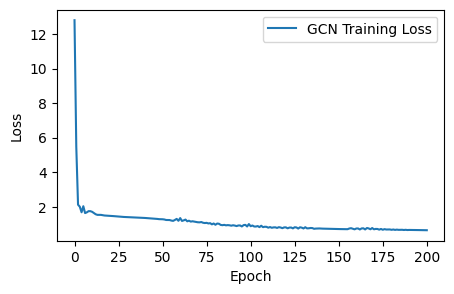

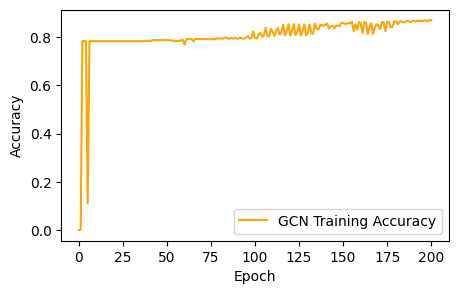

Training model: GAT
Epoch 0, Loss: 8.061585426330566, Accuracy: 0.0001
Epoch 20, Loss: 1.1252775192260742, Accuracy: 0.7967
Epoch 40, Loss: 0.9636116027832031, Accuracy: 0.8169
Epoch 60, Loss: 0.8061748743057251, Accuracy: 0.8330
Epoch 80, Loss: 0.7137933969497681, Accuracy: 0.8403
Epoch 100, Loss: 0.7172431945800781, Accuracy: 0.8486
Epoch 120, Loss: 0.7174985408782959, Accuracy: 0.8109
Epoch 140, Loss: 0.5438024401664734, Accuracy: 0.8606
Epoch 160, Loss: 0.49758386611938477, Accuracy: 0.8975
Epoch 180, Loss: 0.4006035029888153, Accuracy: 0.9056
Epoch 200, Loss: 0.379132479429245, Accuracy: 0.9069

Testing Results for GAT:
+-----------+--------+
|   Metric  | Value  |
+-----------+--------+
|  Accuracy | 0.9215 |
| Precision | 0.9033 |
|   Recall  | 0.9215 |
|  F1 Score | 0.9120 |
|    Loss   | 0.8096 |
+-----------+--------+


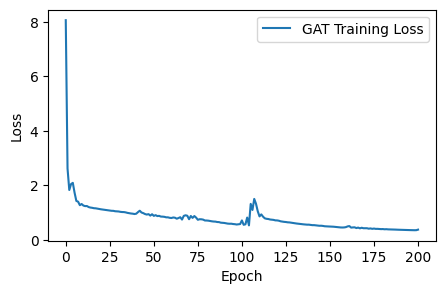

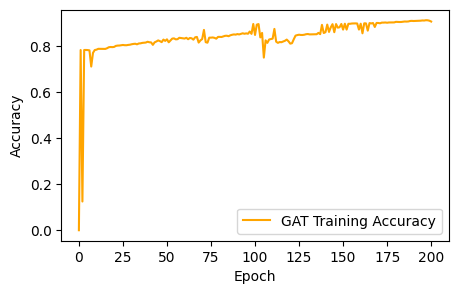

Training model: APPNPNet
Epoch 0, Loss: 44.15266418457031, Accuracy: 0.0001
Epoch 20, Loss: 4.399449348449707, Accuracy: 0.7775
Epoch 40, Loss: 2.8647329807281494, Accuracy: 0.7910
Epoch 60, Loss: 1.8832749128341675, Accuracy: 0.7945
Epoch 80, Loss: 1.276789903640747, Accuracy: 0.8424
Epoch 100, Loss: 1.088851809501648, Accuracy: 0.7947
Epoch 120, Loss: 1.3307156562805176, Accuracy: 0.8316
Epoch 140, Loss: 0.8898397088050842, Accuracy: 0.8815
Epoch 160, Loss: 0.8087295889854431, Accuracy: 0.8797
Epoch 180, Loss: 0.7492401003837585, Accuracy: 0.8812
Epoch 200, Loss: 0.7074452042579651, Accuracy: 0.8820

Testing Results for APPNPNet:
+-----------+--------+
|   Metric  | Value  |
+-----------+--------+
|  Accuracy | 0.9235 |
| Precision | 0.8906 |
|   Recall  | 0.9235 |
|  F1 Score | 0.9066 |
|    Loss   | 1.3606 |
+-----------+--------+


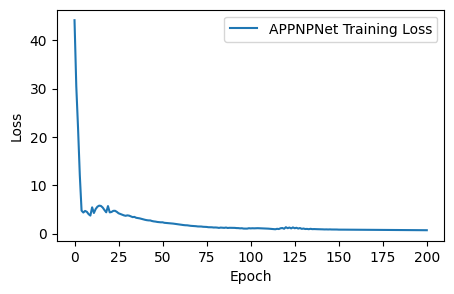

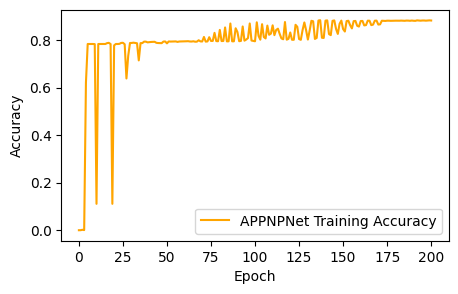

Training model: GraphSAGEModel
Epoch 0, Loss: 20.2164249420166, Accuracy: 0.0004
Epoch 20, Loss: 1.2933228015899658, Accuracy: 0.7884
Epoch 40, Loss: 1.0078529119491577, Accuracy: 0.8151
Epoch 60, Loss: 0.9945406317710876, Accuracy: 0.8067
Epoch 80, Loss: 0.6700239777565002, Accuracy: 0.8636
Epoch 100, Loss: 0.5729512572288513, Accuracy: 0.8711
Epoch 120, Loss: 0.45066729187965393, Accuracy: 0.9069
Epoch 140, Loss: 2.1598470211029053, Accuracy: 0.8140
Epoch 160, Loss: 0.6055418848991394, Accuracy: 0.8531
Epoch 180, Loss: 0.5047760009765625, Accuracy: 0.9016
Epoch 200, Loss: 0.39928990602493286, Accuracy: 0.9194

Testing Results for GraphSAGEModel:
+-----------+--------+
|   Metric  | Value  |
+-----------+--------+
|  Accuracy | 0.9527 |
| Precision | 0.9258 |
|   Recall  | 0.9527 |
|  F1 Score | 0.9381 |
|    Loss   | 0.5524 |
+-----------+--------+


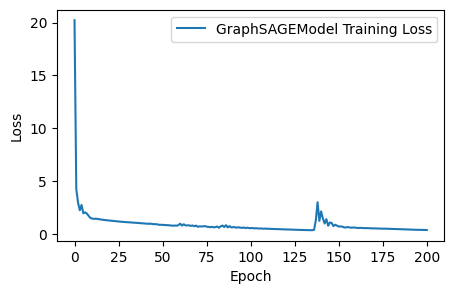

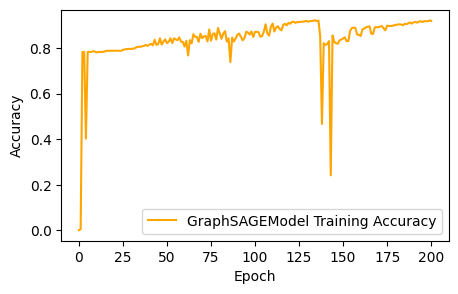

In [ ]:
import copy

train_performance = {}
training_accuracies = {}

test_performance = {}
testing_accuracies = {}

data_object = setup_data(data_object, data['tags_encoded'])

# 1. Training loss, accuracy
# 2. Testing 5 metrics
# 3. Training loss, accuracy plot
# 4. compare training accuracies
# 5. compare testing accuracies

for Model in [GCN, GAT, APPNPNet, GraphSAGEModel]:
    print(f"Training model: {Model.__name__}")

    fresh_data_object = copy.deepcopy(data_object)
    model = Model(num_features=fresh_data_object.x.size(1), num_classes=len(torch.unique(fresh_data_object.y)))
    optimizer, criterion = setup_optimizer_and_loss(model)

    performance = train(model, fresh_data_object, criterion, optimizer)
    train_performance[Model.__name__] = performance
    training_accuracies[Model.__name__] = performance['accuracies'][-1]

    evaluation_metrics = evaluate(model, fresh_data_object, criterion)
    test_performance[Model.__name__] = evaluation_metrics
    testing_accuracies[Model.__name__] = evaluation_metrics['test_accuracy']


    plot_performance(Model.__name__, performance)

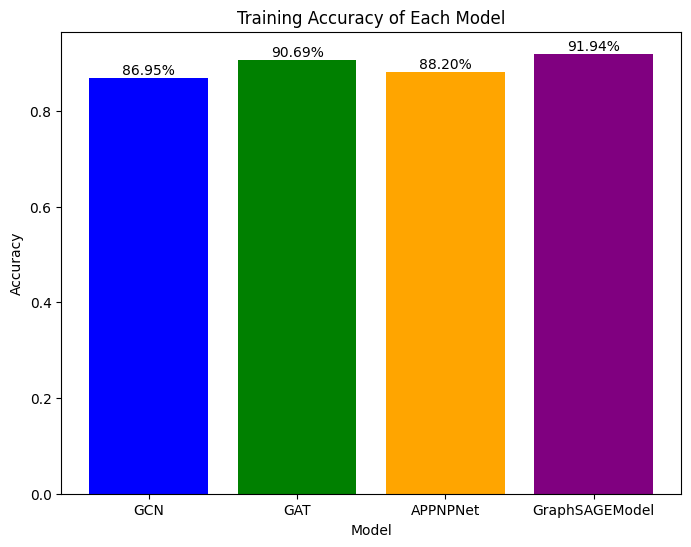

In [ ]:
plt.figure(figsize=(8, 6))
model_names = list(training_accuracies.keys())
accuracies = list(training_accuracies.values())
colors = ['blue', 'green', 'orange', 'purple']

bars = plt.bar(model_names, accuracies, color=colors)

for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{accuracy * 100:.2f}%', ha='center', va='bottom')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Training Accuracy of Each Model')
plt.show()

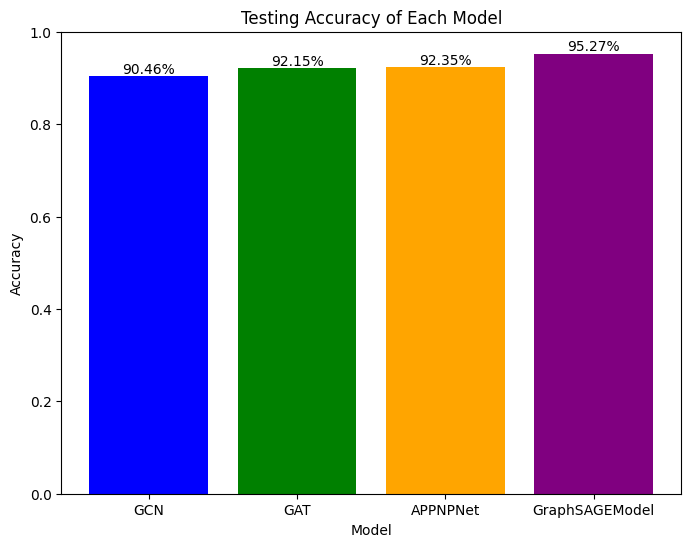

In [ ]:
plt.figure(figsize=(8, 6))
model_names = list(testing_accuracies.keys())
accuracies = list(testing_accuracies.values())
colors = ['blue', 'green', 'orange', 'purple']

bars = plt.bar(model_names, accuracies, color=colors)

for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{accuracy * 100:.2f}%', ha='center', va='bottom')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Testing Accuracy of Each Model')
plt.show()

# _4.HASHTAG RECOMMENDATION SYSTEM_

In [ ]:
def recommend_hashtags(model, data_object, node_idx, tag_encoder, top_k=5):
    model.eval()
    with torch.no_grad():
        # Get model outputs
        out, _ = model(data_object.x, data_object.edge_index)
        node_logits = out[node_idx] # Extracts the output logits for the specified node.

        # Get indices of the top_k predictions
        top_k_indices = torch.topk(node_logits, top_k).indices

        recommended_tags = tag_encoder.inverse_transform(top_k_indices.numpy())

        # Get the actual tag used by the user from the original DataFrame
        node_id = [k for k, v in id_to_index.items() if v == node_idx][0]
        actual_tag = data.loc[data['id'] == node_id, 'tags'].values

        return actual_tag[0] if len(actual_tag) > 0 else "Unknown", recommended_tags

In [ ]:
# Find the best-performing model based on testing accuracy
best_model_name = max(testing_accuracies, key=testing_accuracies.get)
print(f"Best Model: {best_model_name} with accuracy {testing_accuracies[best_model_name]}")

if best_model_name == "GCN":
    best_model = GCN(num_features=data_object.x.size(1), num_classes=len(torch.unique(data_object.y)))
elif best_model_name == "GAT":
    best_model = GAT(num_features=data_object.x.size(1), num_classes=len(torch.unique(data_object.y)))
elif best_model_name == "APPNPNet":
    best_model = APPNPNet(num_features=data_object.x.size(1), num_classes=len(torch.unique(data_object.y)))
elif best_model_name == "GraphSAGEModel":
    best_model = GraphSAGEModel(num_features=data_object.x.size(1), num_classes=len(torch.unique(data_object.y)))

optimizer, criterion = setup_optimizer_and_loss(best_model)

Best Model: GraphSAGEModel with accuracy 0.9526805940095645


In [ ]:
# Example for Hashtag Recommendation with the best model
node_id = '3157134163'
node_idx = id_to_index[node_id]

actual_tag, recommended_tags = recommend_hashtags(best_model, data_object, node_idx, tag_encoder, top_k=5)

print("=== Hashtag Recommendation ===\n")
print(f"User ID: {node_id}\n")
print(f"Actual Hashtag used by the User: \n\n\t{actual_tag}\n")
print(f"Recommended Hashtags:\n")
for i, tag in enumerate(recommended_tags, start=1):
    print(f"\t{i}. {tag}")

=== Hashtag Recommendation ===

User ID: 3157134163

Actual Hashtag used by the User: 

	#justinssextapeleakedparty

Recommended Hashtags:

	1. #justinreactivatedparty", "#veranomtv2016
	2. #nationaldogday", "#justinreactivatedparty
	3. #nationaldogday", "#sundaymorning
	4. #replacetøplyricswithharambe
	5. #respecttylerjoseph", "#youtubeisoverparty


# _5. COMMUNITY DETECTION SYSTEM_

In [ ]:
!pip install scikit-fuzzy

In [ ]:
import numpy as np
import skfuzzy as fuzz
from sklearn.preprocessing import normalize

def get_embeddings(model, data):
    model.eval() # Disable dropout and batch normalization
    with torch.no_grad():
        # Get the node embeddings
        out = model(data.x, data.edge_index) # gives both node_embeddings and attention score or logits
        if isinstance(out, tuple):
            out = out[0]
    return out

embeddings = get_embeddings(best_model, data_object)
print(f"Embeddings shape: {embeddings.shape}") # node x dimentionality (y values)

normalized_embeddings = normalize(embeddings)
print(f"Normalized embeddings shape: {normalized_embeddings.shape}")

Embeddings shape: torch.Size([19862, 225])
Normalized embeddings shape: (19862, 225)


In [ ]:
# Set the number of clusters you want
num_clusters = 5

centroids, membership_matrix, prev_membership_matrix, distances, no_iteratons_to_converge, p, fpc = fuzz.cluster.cmeans(
    normalized_embeddings.T,  # Transpose for correct shape
    c=num_clusters,           # Number of clusters
    m=3,                      # Fuzziness parameter - A higher fuzziness means that the boundaries between clusters are softer, allowing for more shared membership among them
    error=0.005,              # The algorithm stops when changes in membership values are less than this threshold
    maxiter=1000,            # Maximum iterations - ends even not converged after these no of iterations
)

print("Centroids:\n", centroids, "\n")
print("Current Membership Matrix:\n", membership_matrix, "\n") # matrix of fuzzy membership values - data point can belong to multiple clusters with varying degrees of membership.
print("Previous Membership Matrix:\n", prev_membership_matrix, "\n") # The previous iteration's membership matrix
print("Distances:\n", distances, "\n") # Euclidean distances between each data point and that cluster centroid.
print("Final Fuzzy Membership Value (p):\n", p, "\n") # providing insights into how well the clusters are defined. (high - good)
print("Fuzzy Partition Coefficient (fpc):\n", fpc, "\n") # The fuzzy partition coefficient,

Centroids:
 [[-0.05932391 -0.0192052  -0.12706732 ... -0.03093745  0.06381045
  -0.02456797]
 [-0.06024208 -0.01720937 -0.12439962 ... -0.03296567  0.06088233
  -0.01357286]
 [-0.06719619 -0.01340874 -0.12875482 ... -0.0275718   0.06299853
  -0.01991884]
 [-0.12114035  0.05877674  0.02890017 ...  0.0113791   0.07537286
   0.06431136]
 [-0.07355439 -0.01481902 -0.13526641 ... -0.02032413  0.06595569
  -0.02530031]] 

Current Membership Matrix:
 [[0.24765907 0.07978995 0.00415447 ... 0.16013354 0.18774382 0.17476692]
 [0.3594325  0.08138823 0.00423425 ... 0.16645779 0.19027971 0.1798133 ]
 [0.21217429 0.08354443 0.00434217 ... 0.21751518 0.19385767 0.22043593]
 [0.04807281 0.66868179 0.98277076 ... 0.07634559 0.2318251  0.10407138]
 [0.13266132 0.0865956  0.00449834 ... 0.3795479  0.19629369 0.32091246]] 

Previous Membership Matrix:
 [[0.24694658 0.16772876 0.1582816  ... 0.29082387 0.30603504 0.05645642]
 [0.13694606 0.06009205 0.25660959 ... 0.10404284 0.34123049 0.11442758]
 [0.32155

The fpc value ranges between 0 and 1.

Closer to 1: Indicates more distinct clusters, meaning data points are less likely to belong to multiple clusters simultaneously (crisp partition).

Closer to 0: Indicates more fuzzy clusters, with high overlap between clusters.

In [ ]:
# Specify how many clusters each node should belong to
num_clusters_to_assign = 3
predicted_clusters = np.argsort(-centroids, axis=0)[:num_clusters_to_assign]

assigned_clusters = {}
for node_idx in range(centroids.shape[1]):
    assigned_clusters[node_idx] = predicted_clusters[:, node_idx].tolist() # indices of the top clusters

print(predicted_clusters)
print(predicted_clusters.shape,"\n") # no of clusters , no of nodes

for i, (node_idx, clusters) in enumerate(assigned_clusters.items()):
    if i < 10:
        print(f'Node index: {node_idx}, Assigned clusters: {clusters}')
    else:
        break

print()
print(len(assigned_clusters))

[[0 3 3 0 0 1 2 3 1 3 3 4 3 3 4 0 3 4 1 3 4 0 4 4 3 3 0 4 0 0 3 3 1 0 4 0
  4 4 4 3 0 1 3 4 1 1 3 0 4 1 0 4 4 3 3 0 3 1 3 0 4 3 0 1 3 3 0 1 1 3 1 0
  3 3 1 4 3 3 3 3 2 1 3 3 4 1 0 3 0 4 0 0 3 3 3 3 0 3 4 0 2 0 3 3 3 0 4 3
  3 4 3 3 0 1 0 3 3 4 3 4 4 3 1 3 1 3 1 3 3 3 3 1 4 4 3 0 1 3 0 2 3 1 3 1
  3 0 4 4 0 3 3 3 4 0 4 1 0 1 3 4 0 3 4 3 3 3 4 4 1 3 3 3 4 3 0 3 1 0 1 3
  0 3 4 3 3 3 3 4 4 3 4 3 3 3 4 1 3 3 2 3 1 3 3 0 4 4 0 4 0 0 4 4 1 4 1 0
  4 3 3 3 3 3 3 3 3]
 [1 2 1 1 2 0 0 4 0 0 1 0 0 0 2 2 1 2 2 1 2 1 2 2 1 1 1 2 1 1 1 0 0 1 2 2
  2 2 3 1 1 0 1 2 0 0 4 1 2 0 1 2 2 4 1 1 4 0 4 4 2 1 1 0 4 4 1 3 0 4 0 1
  1 1 0 2 4 1 4 4 0 0 4 4 3 0 1 4 1 2 1 1 1 4 1 4 2 1 2 2 1 3 4 1 4 2 2 1
  4 2 1 1 1 2 2 0 0 2 4 2 2 1 0 0 4 4 0 1 4 1 1 0 2 2 4 2 0 4 1 0 4 0 0 4
  4 2 2 2 1 4 4 4 2 1 3 0 1 0 0 1 1 4 3 0 1 1 2 2 2 4 4 1 0 1 1 0 0 2 0 1
  3 1 2 2 0 0 0 2 2 4 0 0 0 1 0 0 4 4 0 0 0 4 4 1 2 2 1 2 1 1 2 0 0 0 0 1
  2 4 0 4 4 1 4 4 1]
 [2 4 0 2 1 2 1 1 2 1 0 1 1 1 0 1 0 1 0 2 0 2 1 0 2 0 2 1 2 2 2 1 2 2 

In [ ]:
node_id = '3157134163'
node_idx = id_to_index[node_id]

print("=== Cluster Assignment ===\n")
print(f"Node Id: {node_id}\n")
print(f"Node Index: {node_idx}\n")

cluster_names = tag_encoder.inverse_transform(assigned_clusters[node_idx])
print(f"Assigned Clusters:\n")

for i, (cluster_id, cluster_name) in enumerate(zip(assigned_clusters[node_idx], cluster_names), start=1):
    print(f"\t{i}. Cluster ID: {cluster_id}, Cluster Name: {cluster_name}\n")

=== Cluster Assignment ===

Node Id: 3157134163

Node Index: 4

Assigned Clusters:

	1. Cluster ID: 0, Cluster Name: #1yearofjetblackheart

	2. Cluster ID: 2, Cluster Name: #ashtonisamazing

	3. Cluster ID: 1, Cluster Name: #6yearsofezria



In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(normalized_embeddings, predicted_labels)
# Measures how similar an object is to its own cluster compared to other clusters.
# It ranges from -1 to +1, where a high value indicates that points are well clustered.
# while a low or negative value indicates poor clustering.

from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(embeddings, predicted_labels)
# The Davies-Bouldin Index ranges from 0 to ∞.
# A lower Davies-Bouldin Index indicates better clustering quality
# A value of 0 indicates perfect clustering, though this is rare in practice.


# The Fuzzy Partition Coefficient ranges from 0 to 1.
# A higher FPC indicates better clustering quality.
# Values close to 1 suggest that the clustering is well-defined, with each data point having a strong membership in one cluster.

In [ ]:
metrics_table = PrettyTable()

metrics_table.field_names = ["Metric", "Value"]
metrics_table.add_row(["Silhouette Score", silhouette_avg])
metrics_table.add_row(["Davies-Bouldin Index", davies_bouldin])
metrics_table.add_row(["Fuzzy Partition Coefficient", fpc])

print(metrics_table)

+-----------------------------+--------------------+
|            Metric           |       Value        |
+-----------------------------+--------------------+
|       Silhouette Score      | 0.6126430893620027 |
|     Davies-Bouldin Index    | 2.0292301318939763 |
| Fuzzy Partition Coefficient | 0.6701168703935171 |
+-----------------------------+--------------------+
